# Logistic Regression

In [165]:
require(ISLR)


In [166]:
names(Smarket)


[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

In [167]:
dim(Smarket)


[1] 1250    9

In [168]:
summary(Smarket)


      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

In [169]:
?Smarket


Smarket                  package:ISLR                  R Documentation

_S&_P _S_t_o_c_k _M_a_r_k_e_t _D_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     Daily percentage returns for the S&P 500 stock index between 2001
     and 2005.

_U_s_a_g_e:

     Smarket
     
_F_o_r_m_a_t:

     A data frame with 1250 observations on the following 9 variables.

     'Year' The year that the observation was recorded

     'Lag1' Percentage return for previous day

     'Lag2' Percentage return for 2 days previous

     'Lag3' Percentage return for 3 days previous

     'Lag4' Percentage return for 4 days previous

     'Lag5' Percentage return for 5 days previous

     'Volume' Volume of shares traded (number of daily shares traded in
          billions)

     'Today' Percentage return for today

     'Direction' A factor with levels 'Down' and 'Up' indicating
          whether the market had a positive or negative return on a
          given day

_S_o_u_r_c_e:



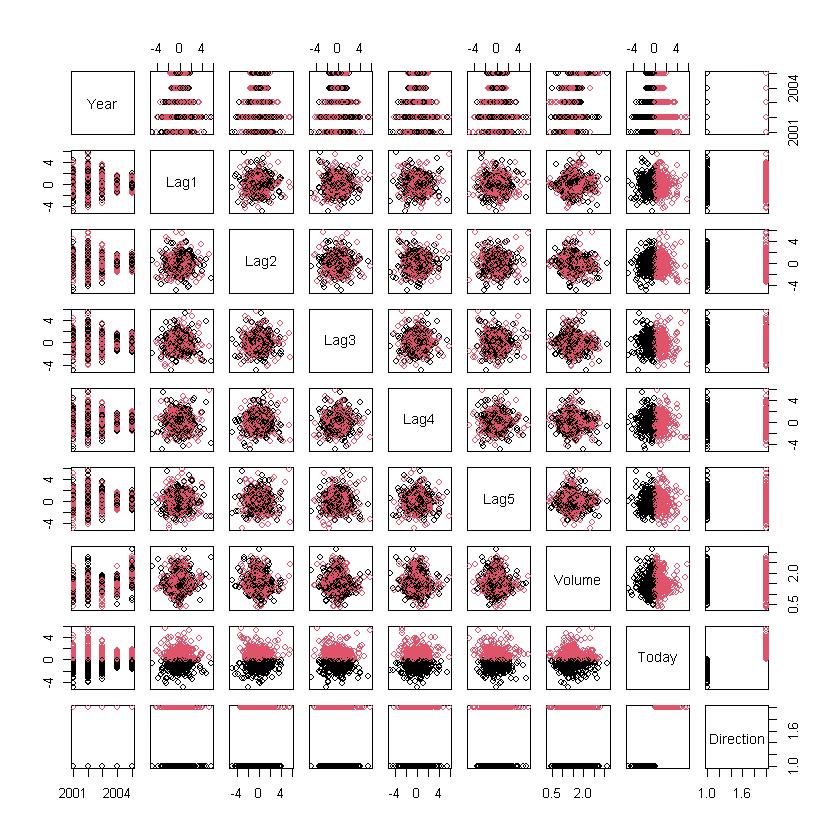

In [170]:
# Plot the variables in Smarket and use
# the binary response as the color indicator.
pairs(Smarket, col = Smarket$Direction)


In [171]:
glm.fit <- glm(
    Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume,
    data = Smarket, family = binomial
)


In [172]:
# None of the coefficients are significant here given the probabilities.
# Not a big surprise for this kind of data...
# It doesn't necessarily mean it won't be able to make any kind
# of reasonable predictions.
# Null deviance is deviance just for the mean.
summary(glm.fit)



Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


In [173]:
# This will make predictions on the training data that we used to fit the model
# as a vector of fitted probabilities.
glm.probs <- predict(glm.fit, type = "response")
glm.probs[1:5]


1         2         3         4         5 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812

In [174]:
# We can turn those probabilities into classifications
# by thresholding at 0.5
glm.pred <- ifelse(glm.probs > 0.5, "Up", "Down")


In [175]:
attach(Smarket)
table(glm.pred, Direction)


The following object is masked _by_ .GlobalEnv:

    Direction


The following objects are masked from Smarket (pos = 3):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year


The following objects are masked from Smarket (pos = 4):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year


The following objects are masked from Smarket (pos = 5):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year


The following objects are masked from Smarket (pos = 6):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year


The following objects are masked from Smarket (pos = 7):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year


The following objects are masked from Smarket (pos = 8):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year


The following objects are masked from Smarket (pos = 9):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year


The following objects are masked from Smarket (pos = 10):

 

[1] 1250

[1] 1250

        Direction
glm.pred Down  Up
    Down  145 141
    Up    457 507

In [176]:
# Mean classification performance or the cases where glm.pred
# is actually equal to the direction.
mean(glm.pred == Direction)
# So it seems on the training data we do slightly better than chance.
# We may have overfit in our training data so let's divie it up
# into a training and test set.


[1] 0.5216

In [177]:
# Make a vector of logicals.
# For all observations where year is less than 2005 we'll get a true,
# otherwise we'll get a false.
train <- Year < 2005


In [182]:
# And now we refit our glm.fit, except we say subset equals train.
# And so it will use any of those observations for which train is true.
glm.fit <- glm(
    Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume,
    data = Smarket, family = binomial, subset = train
)


In [179]:
# Predict on remaining data; year is 2005 or greater.
glm.probs <- predict(glm.fit, newData = Smarket[!train], type = "response")

In [180]:
glm.pred <- ifelse(glm.probs > 0.5, "Up", "Down")


In [183]:
#Direction.2005 <- Direction[!train]
#table(glm.pred, Direction.2005)


In [185]:
#mean(glm.pred == Direction.2005)

In [191]:
# We might be overfitting so let's do a smaller model.
glm.fit <- glm(
    Direction ~ Lag1 + Lag2,
    data = Smarket, family = binomial, subset = train
)
glm.probs <- predict(glm.fit, newData = Smarket[!train], type = "response")
glm.pred <- ifelse(glm.probs > 0.5, "Up", "Down")
# table(glm.pred, Direction.2005)
# mean(glm.pred == Direction.2005) # Correct classification percent/prediction perf.
# Nothing became significant but the prediction performance improved.
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2, family = binomial, data = Smarket, 
    subset = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.345  -1.188   1.074   1.164   1.326  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.03222    0.06338   0.508    0.611
Lag1        -0.05562    0.05171  -1.076    0.282
Lag2        -0.04449    0.05166  -0.861    0.389

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1383.3  on 997  degrees of freedom
Residual deviance: 1381.4  on 995  degrees of freedom
AIC: 1387.4

Number of Fisher Scoring iterations: 3
